1-107_ERP.zip 파일을 압축 해제하여, 해당 3개의 데이터 파일을 불러와 아래의 분석을 실시하시오.
해당 데이터는 생필품을 납품하는 회사의 ERP Enterprise Resource Planning(전사적 자원 관리)에서 발생한, 유통 관련 데이터이다.
07_ERP.zip 파일을 압축 해제하여, 해당 3개의 데이터를 불러와 아래와 같이 변환 하시오.

기간은 파일 상단에 적힌 기간월을 작성
Column 명 '합계'는 앞에 공백이 존재 ' 합계'

In [ ]:
import numpy as np
import pandas as pd
# 코렙
from google.colab import files
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')
data1=pd.read_excel('/content/drive/MyDrive/DSA/기간별상품매출현황_202306.xlsx',skiprows=2)

data1=data1.iloc[2:] #앞의 두 열 버리기
df1= data1.melt(id_vars=data1.columns[0:4]) # 남길 컬럼들 id_vars에 저장

df1.rename(columns = {'variable':'지점','value':'판매량'},inplace=True)
df1['기간']='6월'
df1.head()



data2=pd.read_excel('/content/drive/MyDrive/DSA/기간별상품매출현황_202307.xlsx',skiprows=2)

data2=data2.iloc[2:] #앞의 두 열 버리기
df2= data2.melt(id_vars=data2.columns[0:4]) # 남길 컬럼들 id_vars에 저장

df2.rename(columns = {'variable':'지점','value':'판매량'},inplace=True) #열 이름 수정
df2['기간']='7월' #기간 추가
df2.head()


data3=pd.read_excel('/content/drive/MyDrive/DSA/기간별상품매출현황_202308.xlsx',skiprows=2)

data3=data3.iloc[2:] #앞의 두 열 버리기
df3= data3.melt(id_vars=data3.columns[0:4]) # 남길 컬럼들 id_vars에 저장

df3.rename(columns = {'variable':'지점','value':'판매량'},inplace=True) #열 이름 수정
df3['기간']='8월' #기간 추가
df3.head()



#1-2. 지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.

In [ ]:
# 두 데이터 테이블 병합 pd.merge()/ on = 키 column / how = 병합전략

m1=pd.merge(df1,df2,on=['순번','상품코드','상품명','지점','기간','판매량',' 합계'],how='outer')
df=pd.merge(m1,df3,on=['순번','상품코드','상품명','지점','기간','판매량',' 합계'],how='outer')

df

# 저는 concat를 몰랐어서,, merge로 두 번 합쳤습니다 성준님 all data랑 제 df랑 같은 데이터프레임 같아요

#1-2. 지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.

#'지점'별 '판매량'의 '합'을 Pivot table로 계산해
#'판매량' 기준 내림순으로 정리한 다음
#'판매량'이 가장 높은 2개 지점
# '지점'별 '판매량'의 합을 계산하고 내림차순으로 정렬하여 상위 2개 지점 선택
top_2_stores = df.pivot_table(index='지점', values='판매량', aggfunc='sum').sort_values(by='판매량', ascending=False).head(2)
print(top_2_stores)


#1-3. 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오


In [ ]:
#1-3. 앞서 확인한, 2개의 지점의 '판매량'에 대해 각각 정규성 검정을 수행하고, 결론을 작성하시오
from scipy import stats
# 1-1.'부천점'의 판매량과 '안양점'의 판매량에 대해 정규성 검정을 수행한다.
# 귀무가설 : 해당 숫자 데이터의 분포는 정규분포를 따른다
# 대립가설 : 해당 숫자 데이터의 분포는 정규분포를 따르지 않는다

cond1=(df['지점']=='(610)부천점')
df_1st=df.loc[cond1]
df_1st['판매량']=pd.to_numeric(df_1st['판매량'],errors='coerce')

cond2=(df['지점']=='(600)안양점')
df_2st=df.loc[cond2]
df_2st['판매량']=pd.to_numeric(df_2st['판매량'],errors='coerce')

p1=stats.normaltest(df_1st['판매량'])
#P.value < 0.05(5%) / 대립가설 참 /해당 숫자 데이터의 분포는 정규분포를 따르지 않는다
p2=stats.normaltest(df_2st['판매량'])
#P.value < 0.05(5%) / 대립가설 참 /해당 숫자 데이터의 분포는 정규분포를 따르지 않는다
print('(610)부천점판매량은?',p1)
print('(600)안양점판매량은?',p2)

#1-4앞서 확인한, 2개의 지점의 '판매량'의 대표값(중앙값)의 차이를 계산하고자 한다. 가설을 수립하고, Rank Sum Test를 이용해 가설검정을 수행하시오 .

In [ ]:
import pandas as pd
from scipy import stats

# 데이터 준비
# df는 앞서 병합한 데이터프레임입니다.
# 상위 2개 지점의 이름을 가져옵니다.
top_stores = df.pivot_table(index='지점', values='판매량', aggfunc='sum').sort_values(by='판매량', ascending=False).head(2)

# 각 지점의 '판매량' 데이터를 loc를 사용하여 추출합니다.
data_store1 = df.loc[df['지점'] == top_stores.index[0], '판매량']
data_store2 = df.loc[df['지점'] == top_stores.index[1], '판매량']

# 중앙값 계산
median_store1 = data_store1.median()
median_store2 = data_store2.median()
median_difference = median_store1 - median_store2 #여기까지 오케이

print(f"{top_stores.index[0]}의 중앙값: {median_store1}, {top_stores.index[1]}의 중앙값: {median_store2}")
print(f"중앙값의 차이: {median_difference}")

# Rank Sum Test 수행
stat, p_value = stats.ranksums(data_store1.dropna(), data_store2.dropna())
print(f"Rank Sum Test Statistic: {stat}, p-value: {p_value}")

# p-value를 통해 귀무가설을 기각할 수 있는지 확인
alpha = 0.05
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 지점의 중앙값은 차이가 있습니다.")
else:
    print("귀무가설을 기각할 수 없습니다. 두 지점의 중앙값은 차이가 없습니다.")


1-5앞서 확인한, 2개의 지점의 '판매량'의 Histogram을 Plotly라이브러리로 시각화 하시오.



In [ ]:
import plotly.express as px #동적 시각화
import pandas as pd
# 판매량이 가장 높은 상위 2개 지점 추출
top_stores = df.pivot_table(index='지점', values='판매량', aggfunc='sum').sort_values(by='판매량', ascending=False).head(2)

# 각 지점의 '판매량' 데이터를 loc를 사용하여 추출합니다.
data_store1 = df.loc[df['지점'] == top_stores.index[0], '판매량']
data_store2 = df.loc[df['지점'] == top_stores.index[1], '판매량']

# 지점 정보를 포함한 DataFrame 생성
store1_df = pd.DataFrame({'지점': top_stores.index[0], '판매량': data_store1})
store2_df = pd.DataFrame({'지점': top_stores.index[1], '판매량': data_store2})

# 두 DataFrame을 병합합니다.
combined_data = pd.concat([store1_df, store2_df], ignore_index=True)

# 결과 확인
print(combined_data)




In [ ]:
px.histogram(combined_data,x='판매량',color='지점',barmode='group')

1-6'기간'별 가장 '판매량'의 '합'이 높은 '지점'을 확인하고, 특정 '기간' (월)을 입력했을 때, 해당 월의 '지점' 별 '판매량'의 합을 result_{월}.xlsx로 저장하는 함수를 생성하시오.



In [ ]:
all_data = pd.concat([df1, df2, df3])
all_data
# 기간별로 판매량 합계 계산
sales_by_period = all_data.groupby(['기간', '지점'])['판매량'].sum().reset_index()

# 각 기간별로 판매량 합계가 가장 높은 지점 찾기
top_locations = sales_by_period.loc[sales_by_period.groupby('기간')['판매량'].idxmax()]

# 결과 출력
for index, row in top_locations.iterrows():
    print(f"기간: {row['기간']}, 지점: {row['지점']}, 판매량: {row['판매량']}")

In [ ]:

# 특정 기간의 판매량을 출력하는 함수
def print_sales_by_period(month):
    # 입력된 월에 해당하는 데이터 필터링
    filtered_data = top_locations[top_locations['기간'] == month]

    # 결과 출력
    if not filtered_data.empty:
        for index, row in filtered_data.iterrows():
            print(f"지점: {row['지점']} 판매량: {row['판매량']}")
    else:
        print(f"{month}에 해당하는 데이터가 없습니다.")

# 사용자로부터 특정 기간 (월) 입력 받기
user_input = input("판매량을 확인할 기간을 입력하세요 (예: 6월): ")
print_sales_by_period(user_input)  # 사용자가 입력한 월로 호출


In [ ]:
import pandas as pd

# 특정 기간의 판매량을 출력하고 DataFrame을 반환하는 함수
def print_sales_by_period(month):
    # 입력된 월에 해당하는 데이터 필터링
    filtered_data = top_locations[top_locations['기간'] == month]

    # 결과 출력
    if not filtered_data.empty:
        for index, row in filtered_data.iterrows():
            print(f"지점: {row['지점']} 판매량: {row['판매량']}")
    else:
        print(f"{month}에 해당하는 데이터가 없습니다.")

    return filtered_data  # 필터링된 데이터를 반환

# 사용자로부터 특정 기간 (월) 입력 받기
user_input = input("판매량을 확인할 기간을 입력하세요 (예: 6월): ")
filtered_data = print_sales_by_period(user_input)  # 사용자가 입력한 월로 호출

# 필터링된 데이터가 있을 경우 Excel 파일로 저장
if not filtered_data.empty:
    filtered_data.to_excel(f'result_{user_input}.xlsx', index=False)
    print(f"{user_input}에 해당하는 데이터가 result_{user_input}.xlsx로 저장되었습니다.")
    files.download(f'result_{user_input}.xlsx')


1-7'상품명'에 '마스크'와'휴지' 제품을 나누어 분석하고자 한다. 상품명을 '휴지'와 '마스크'로 분류한 뒤, (나머지는 '기타') '상품분류'라는 파생변수를 만들어, 두 상품의 '판매량'의 대표값의 차이를 가설 검정 하시오.

In [ ]:
m1=pd.merge(df1,df2,on=['순번','상품코드','상품명','지점','기간','판매량',' 합계'],how='outer')
df=pd.merge(m1,df3,on=['순번','상품코드','상품명','지점','기간','판매량',' 합계'],how='outer')

df

# 저는 concat를 몰랐어서,, merge로 두 번 합쳤습니다 성준님 all data랑 제 df랑 같은 데이터프레임 같아요

#1-2. 지점' 중 '판매량'의 합이 가장 높은 2개 지점을 확인하시오.

#'지점'별 '판매량'의 '합'을 Pivot table로 계산해
#'판매량' 기준 내림순으로 정리한 다음
#'판매량'이 가장 높은 2개 지점
# '지점'별 '판매량'의 합을 계산하고 내림차순으로 정렬하여 상위 2개 지점 선택
cond1=(df['상품명']=='마스크')
df.loc[cond1]
cond1=(df['상품명']=='휴지')
df.loc[cond1]
df['상품분류']=df['상품명'].apply(lambda x:'마스크' if '마스크' in x else ('휴지' if '휴지' in x else '기타')) #상품분류 후 파생변수 생성

#'상품분류'별 '판매량'의 '대표값'을 pivot table로 계산
df.pivot_table(index='상품분류',values='판매량',aggfunc='mean')

아래는 CRM(Customer Relationship Management) 데이터에서 주로 사용하는 RFM 분석을 수행한 데이터이다.

RFM 분석

RFM 분석은 고객 세분화를 위한 효과적인 도구로 사용되는 마케팅 분석 방법

RFM은 Recency(최근성), Frequency(빈도), Monetary(금액)의 약어로, 이 세 가지 요소를 기반으로 고객을 분류하고 타겟팅하는 방법

Recency(최근성): 고객이 얼마나 최근에 구매를 했는지 (Recency 값이 낮으면 자주 방문하는 고객)
Frequency(빈도): 고객이 일정 기간 동안 얼마나 자주 구매를 하는지
Monetary(금액): 고객이 일정 기간 동안 얼마나 많은 금액을 소비했는지
각 R / F / M 값을 계산하여, 최종점수를 합산 -> 합산된 점수를 이용해 고객 분할

환산점수로 분할 : 특정 기준 값을 정하고 고객 세그먼트
사분범위로 분할 : Quantile 값을 기준으로 고객 세그먼트
#'11_Data.csv' 데이터를 이용해, 최근성(Recency_int와)가 가장 높은 상위 10% 고객들의 성비와 평균 나이를 계산하시오.

2-1'11_Data.csv'데이터는 포장용기를 판매하는 회사에서 발생한 데이터이며, 포장용기를 온라인으로 구매한 고객들의 정보가 담긴 데이터이다.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DSA/11_Data (1).csv')

In [ ]:
df

In [ ]:
# 최근성(Recency_int) 기준으로 상위 10% 고객 선정
top_10_percent_threshold = df['Recency_int'].quantile(0.9)  # 상위 10%는 90번째 백분위수
top_customers = df[df['Recency_int'] >= top_10_percent_threshold]

# 성비 계산
gender_counts = top_customers['성별'].value_counts()  # 'gender' 열의 성비 계산
gender_ratio = gender_counts / gender_counts.sum()  # 성비 비율 계산

# 평균 나이 계산
average_age = top_customers['나이'].mean()  # 'age' 열의 평균 나이 계산

# 결과 출력
print("상위 10% 고객 성비:")
print(gender_ratio)
print(f"상위 10% 고객 평균 나이: {average_age:.2f}")

2-2금액(Monetary)이 높은 1000명의 데이터를 추출하여, '사업자구분'에서 '개인'과 '사업자'간 주기성(Frequency)의 평균의 차이가 있는지 검정하시오.

In [ ]:
df.sort_values(by='Monetary', ascending=False).head(1000).reset_index() # Monetary 값을 기준으로 내림차순 정렬


In [ ]:
df_1000=df.sort_values(by='Monetary', ascending=False).head(1000).reset_index() # Monetary 값을 기준으로 내림차순 정렬

print(df_1000)

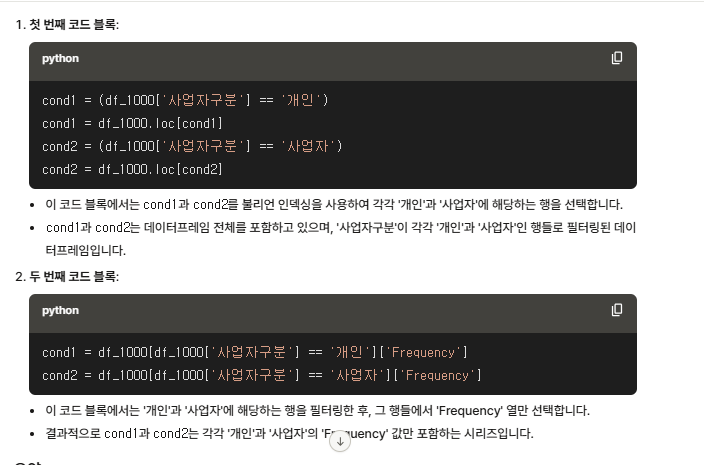

In [ ]:
import pandas as pd
from scipy import stats
#'사업자구분'에서 '개인'과 '사업자'
cond1=(df_1000['사업자구분']=='개인')
cond1=df_1000.loc[cond1]
cond2=(df_1000['사업자구분']=='사업자')
cond2=df_1000.loc[cond2]


# '개인'과 '사업자' 그룹의 Frequency 데이터 추출
cond1 = df_1000[df_1000['사업자구분'] == '개인']['Frequency']  #f_1000[df_1000와 같은 표현은 일반적으로 Pandas 라이브러리를 사용하는
#Python 코드에서 DataFrame을 필터링하는 방식입니다.
#이 표현에서 df_1000은 DataFrame의 이름이고, 대괄호 안에 있는 조건은 해당 DataFrame에서 특정 조건을 만족하는 행을 선택하는 데 사용됩니다.
#예를 들어, df_1000[df_1000['column_name'] > value]와 같은 형태로 사용될 수 있습니다.
#여기서 df_1000은 DataFrame이고, 대괄호 안의 조건은 df_1000의 특정 열(column_name)의 값이 value보다 큰 행을 선택하는 것입니다.
cond2 = df_1000[df_1000['사업자구분'] == '사업자']['Frequency']

# t-검정 수행
t_stat, p_value = stats.ttest_ind(cond1, cond2)

# 결과 출력
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# 유의수준 설정 (예: 0.05)
alpha = 0.05
if p_value < alpha:
    print("두 그룹 간의 주기성(Frequency)의 평균 차이가 통계적으로 유의미합니다.")
else:
    print("두 그룹 간의 주기성(Frequency)의 평균 차이가 통계적으로 유의미하지 않습니다.")




2-3최근성(Recency_int와)과 금액(Monetary)간의 상관성을 확인하고자 한다. 성별에 따른 최근성과 금액의 산점도를 시각화 하고, 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.

In [ ]:
df_1000

In [ ]:
import scipy.stats as stats #검정
import matplotlib.pyplot as plt
import seaborn as sns #동적 시각화

# 산점도 시각화
sns.scatterplot(df, x='Recency_int', y='Monetary', hue='성별')
plt.title('성별에 따른 최근성과 금액의 산점도')
plt.xlabel('최근성 (Recency_int)')
plt.ylabel('금액 (Monetary)')

In [ ]:
# 최근성과 금액 데이터
recency = df['Recency_int']
monetary = df['Monetary']

# 피어슨 상관계수 및 p-값 계산
correlation_coefficient, p_value = stats.pearsonr(recency, monetary)

# 결과 출력
print(f'피어슨 상관계수: {correlation_coefficient}')
print(f'p-값: {p_value}')

# 결론 도출
alpha = 0.05  # 유의수준
if p_value < alpha:
    print("귀무가설을 기각합니다. 최근성과 금액 간에 상관관계가 있습니다.")
else:
    print("귀무가설을 채택합니다. 최근성과 금액 간에 상관관계가 없습니다.")

2-4유입경로'의 빈도수가 가장 높은 항목에 대해 Recency_int와 Frequency, Monetary의 기술 통계량을 계산하시오.

In [ ]:
data.value_counts('유입경로')

# '유입경로'의 빈도수가 가장 높은 항목 = '블로그 광고'

cond1=(data['유입경로']=='블로그광고')
data_inflow_path=data.loc[cond1]

data_inflow_path.pivot_table(index='유입경로',values=['Recency_int','Frequency','Monetary'],
                             aggfunc=['mean','median','std'])

2-5회원가입일과 최종접속일 데이터를 이용해 '접속기간'이라는 파생 변수를 생성하고, '접속기간'이 가장 오래된 100명의 고객 명단을 뽑아 result_vip_member.xlsx로 저장

In [ ]:
import pandas as pd

# 최종접속일 데이터의 오전-> AM, 오후->PM 으로 변환
data['최종접속일'] = data['최종접속일'].str.replace('오전', 'AM').str.replace('오후', 'PM')
# 날짜 변환 (format을 명확히 지정)
data['최종접속일'] = pd.to_datetime(data['최종접속일'], format="%Y-%m-%d %p %I:%M", errors='coerce')
# 최종접속일 데이터에서 시간 데이터 제거
data['최종접속일'] = data['최종접속일'].dt.floor('D')

# 날짜 데이터로 변경
data['회원 가입일']=pd.to_datetime(data['회원 가입일'])

# '접속기간' 파생변수 생성
data['접속기간']=data['최종접속일']-data['회원 가입일']


# '접속기간' 데이터를 내림차순으로 정렬
# 상위 100명 추출 후 파일로 저장
data.sort_values(by='접속기간',ascending=False).head(100).to_excel('result_vip_member.xlsx')

In [ ]:
# 2. 접속기간 계산
#df['회원 가입일'] = pd.to_datetime(df['회원 가입일'])
#df['최종접속일'] = pd.to_datetime(df['최종접속일'])
#df['접속기간'] = (df['최종접속일'] - df['회원 가입일']).dt.days

# 3. 접속기간 기준으로 정렬 후 상위 100명 추출
#oldest_members = df.nsmallest(100, '접속기간')

# 4. Excel 파일로 저장
#oldest_members.to_excel('result_vip_member.xlsx', index=False)

In [ ]:
#import pandas as pd

# 1. 데이터 불러오기


# 2. 접속기간 계산
# '회원가입일'과 '최종접속일'의 형식을 변환
#df['회원  가입일'] = pd.to_datetime(df['회원 가입일'].str.replace('오후', 'PM').str.replace('오전', 'AM'), format='%Y-%m-%d %p %I:%M')
#df['최종접속일'] = pd.to_datetime(df['최종접속일'].str.replace('오후', 'PM').str.replace('오전', 'AM'), format='%Y-%m-%d %p %I:%M')

# '접속기간' 계산
#df['접속기간'] = (df['최종접속일'] - df['회원가입일']).dt.days

# 3. 접속기간 기준으로 정렬 후 상위 100명 추출
#oldest_members = df.nsmallest(100, '접속기간')

# 4. Excel 파일로 저장
#oldest_members.to_excel('result_vip_member.xlsx', index=False)


In [ ]:
df